# Title of Project

### Credit Card Fraud Detection Project

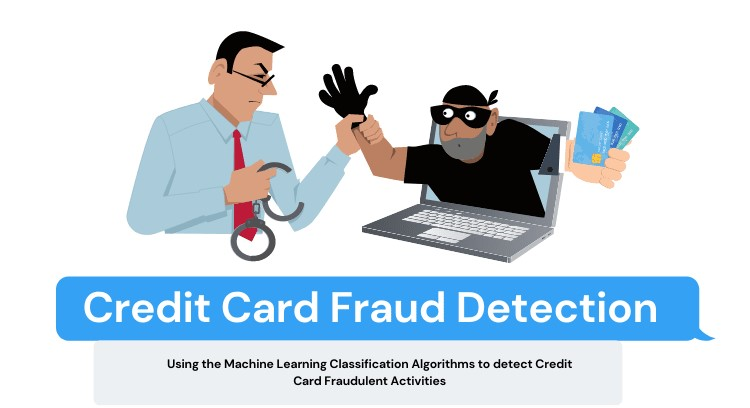

## Import libraries

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score,confusion_matrix,f1_score,roc_curve, classification_report

import pickle
import warnings 
warnings.filterwarnings('ignore')

In [7]:
# Read the data set

df=pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [8]:
# Print the data set

df.head(10).style.background_gradient(cmap='summer')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
5,2.000000,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4.000000,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7.000000,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.800000,0
8,7.000000,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.200000,0
9,9.000000,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


## Exploratory Data Analysis

In [9]:
# info of data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# check the null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Summary of data set

- There are 284807 rows and 31 columns
- All columns are numerical 
- There is no null value in data set

In [11]:
# statistical analysis of data set

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# counting the datapoint related to fraud and non fraud class

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
# Plot the bar graph

import plotly.express as px


px.bar(x=df['Class'].value_counts().index,y= df['Class'].value_counts())

### Observation
- 0 means Non Fraud transaction
- 1 means Fraud transaction
- 284315 observations belongs to Non Fraud Transaction
- 492 observations belong to Fraud Transaction
- As we can see data set is imbalance, most of the data point are related to non fraud transaction

## Distribution 

Text(0.5, 1.0, 'Distribution of Amount')

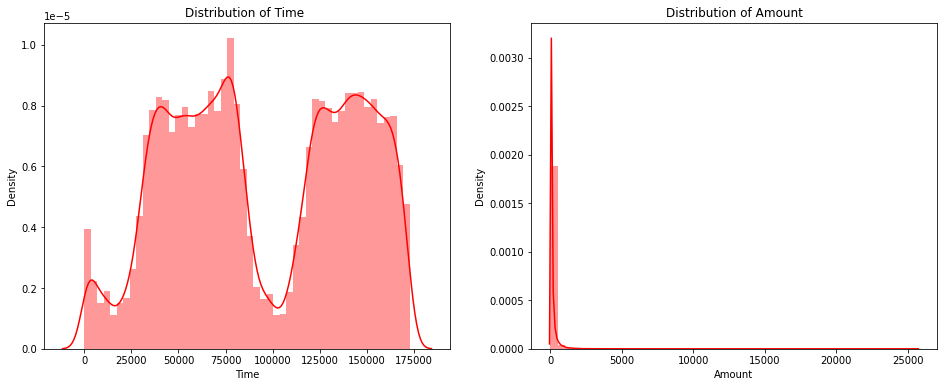

In [14]:
# distribution of time  and amount variable

fig,axes=plt.subplots(1,2,figsize=(16,6))

sns.distplot(ax=axes[0],a=df['Time'],color='red')
sns.distplot(ax=axes[1],a=df['Amount'],color='red')
axes[0].set_title('Distribution of Time ')
axes[1].set_title('Distribution of Amount')


## Feature Scaling 

- All the feature columns are scaled excepting Time and Amount columns
- Scale Time and Amount columns 

In [15]:
# scaling the time and amount

rob_scaler=RobustScaler()

df['Time_scaled']=rob_scaler.fit_transform(df[['Time']])
df['Amount_scaled']=rob_scaler.fit_transform(df[['Amount']])

df=df.drop(['Time','Amount'],axis=1)

In [16]:
# Inserting the time and amount varibale at 0 and 1 place

time_scaled=df['Time_scaled']
amount_scaled=df['Amount_scaled']

df.insert(0,'time_scaled',time_scaled)
df.insert(1,'amount_scaled',amount_scaled)

df=df.drop(['Time_scaled','Amount_scaled'],axis=1)

In [17]:
# print the head of datafram

df.head()

,time_scaled,amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Handling imbalance data
- To handle the imbalace data we can use two technique
- 1. Uersampling
- 2. Oversampling


## Under Sampling technique

- Our data set is highly imbalanced 
- We are going to take under sampling where farud transaction and non fraud trasaction should be equal
- Before Doing under sampling shuffle the data set
- In under sampling we are lossing information because we are removing rows

In [18]:
# shuffle the data set

df=df.sample(frac=1)


# use random under sampling

fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0][:492]

# concat the non_fraud and fraud

normal_distributed_df=pd.concat([fraud, non_fraud])

# shuffling the data set

new_df=normal_distributed_df.sample(frac=1, random_state=1)



In [19]:
# print the shape of data set
new_df.shape

(984, 31)

In [20]:
# counting the fraud and non fraud transaction

new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64


- As we can see now new dataframe has 492 fraud transaction and 492 non fraud transaction
- Now this sample data is balanced

## Visualization

<AxesSubplot:>

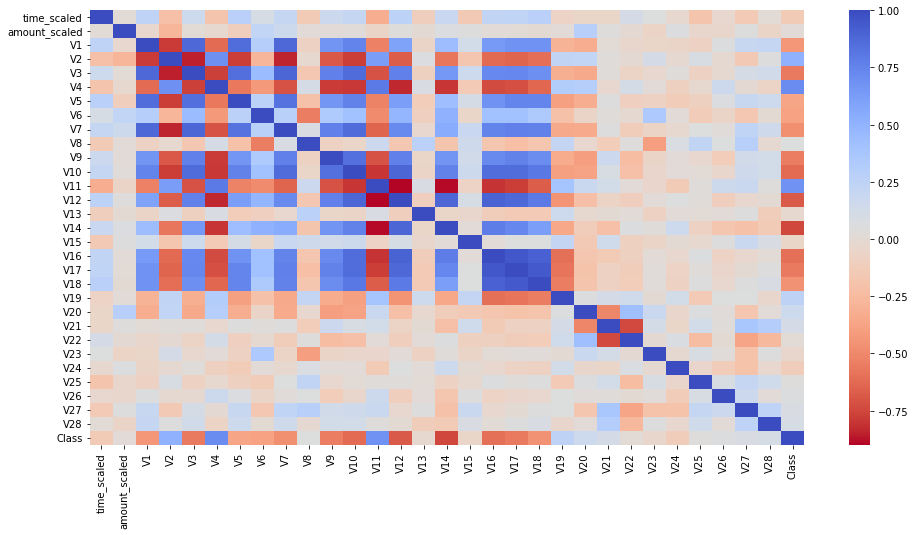

In [21]:
# check the correlation or create heatmap throug new sample data set

plt.figure(figsize=(16,8))
sns.heatmap(new_df.corr(),cmap='coolwarm_r')

### Analysis of correlation 
- Positively realted:-- V2, V4, V11, V19 are positively related to fraud transaction

- Negatively related:-- V3, V10, V12, V14, V16 are negatively realted to fraud transaction

Text(0.5, 1.0, 'V19')

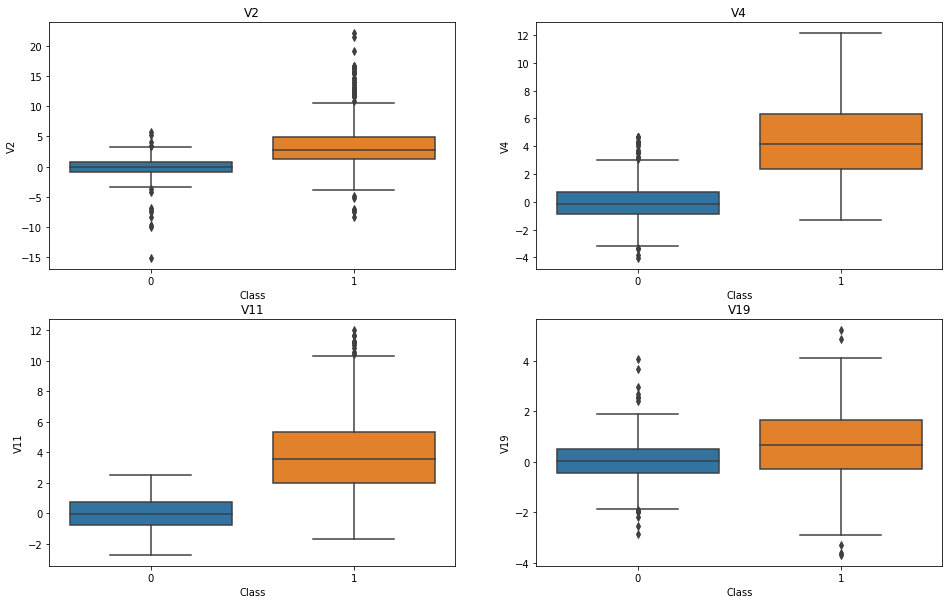

In [22]:
# boxplot of positively related features
fig, axes = plt.subplots(2,2, figsize=(16,10))
axes=axes.flatten()

sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[0])
axes[0].set_title('V2')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4')

sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('V11')

sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19')



Text(0.5, 1.0, 'V14')

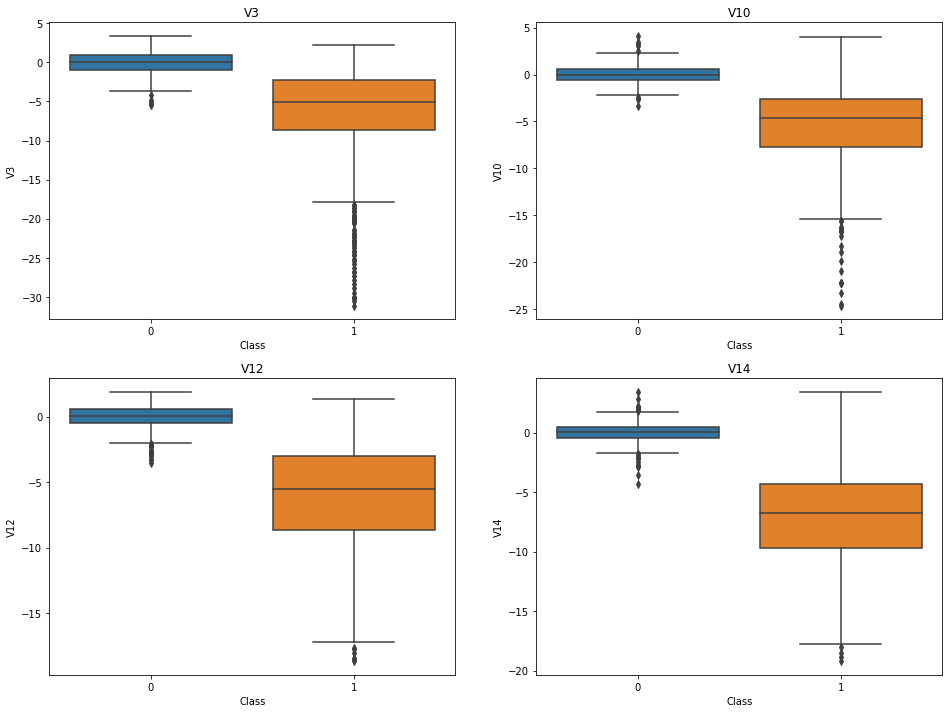

In [23]:
# boxplot of negatively related features

fig, axes = plt.subplots(2,2, figsize=(16,12))
axes=axes.flatten()

sns.boxplot(x="Class", y="V3", data=new_df, ax=axes[0])
axes[0].set_title('V3')

sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[1])
axes[1].set_title('V10')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[3])
axes[3].set_title('V14')


## Boxplot analysis
- We can see there are some outliers in our data set
- We have to remove out only extreme outliers not all the outliers

### Remove Outliers 

- Removing outliers using IQR 

In [24]:
# removing the outliers using IQR


# removing the outliers of fraud transaction in v14 features

v14_fraud=new_df['V14'].loc[new_df['Class']==1]

q25,q75= np.percentile(v14_fraud,25), np.percentile(v14_fraud,75)

IQR=q75-q25

lower_bound=q25-1.5*IQR
upper_bound=q75+1.5*IQR

new_df=new_df[(new_df['V14']>lower_bound)& (new_df['V14']<upper_bound)]


# removing the outliers of fraud transaction in v12 features

v12_fraud=new_df['V12'].loc[new_df['Class']==1]
q25,q75= np.percentile(v12_fraud,25), np.percentile(v12_fraud,75)
IQR=q75-q25

lower_bound=q25-1.5*IQR
upper_bound=q75+1.5*IQR

new_df=new_df[(new_df['V12']>lower_bound)& (new_df['V12']<upper_bound)]

# removing the outliers of fraud transaction in v10 features

v10_fraud=new_df['V12'].loc[new_df['Class']==1]
q25,q75= np.percentile(v10_fraud,25), np.percentile(v10_fraud,75)
IQR=q75-q25

lower_bound=q25-1.5*IQR
upper_bound=q75+1.5*IQR
new_df=new_df[(new_df['V10']>lower_bound)& (new_df['V10']<upper_bound)]


Text(0.5, 1.0, 'V14 distribution')

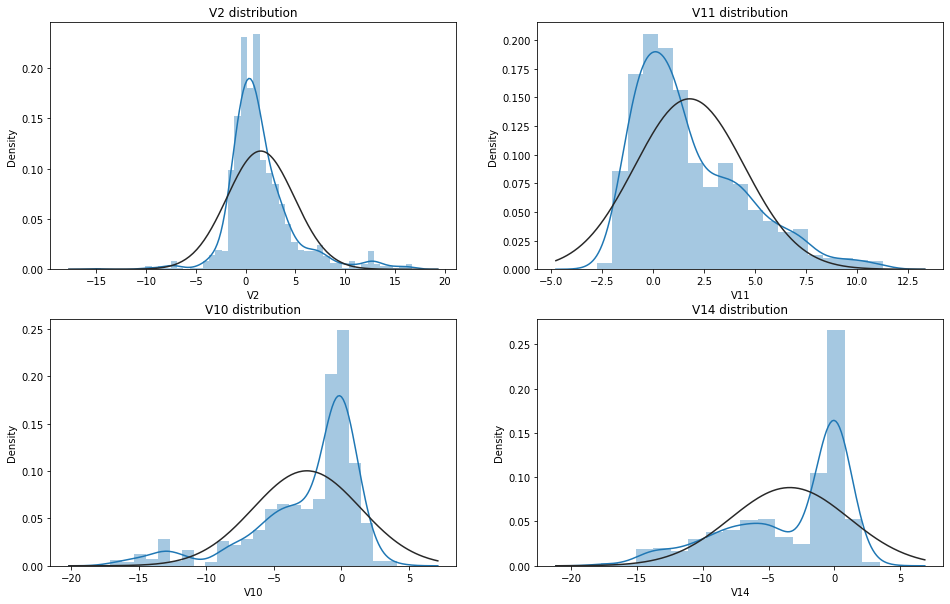

In [25]:
# visualize the distribution of features

from scipy.stats import norm
fig,axes=plt.subplots(2,2,figsize=(16,10))
axes=axes.flat

sns.distplot(ax=axes[0],a=new_df['V2'],fit=norm)
axes[0].set_title('V2 distribution')
sns.distplot(ax=axes[1],a=new_df['V11'],fit=norm)
axes[1].set_title('V11 distribution')
sns.distplot(ax=axes[2],a=new_df['V10'],fit=norm)
axes[2].set_title('V10 distribution')
sns.distplot(ax=axes[3],a=new_df['V14'],fit=norm)
axes[3].set_title('V14 distribution')

## Spliting the dataset

#### split the data set into feature and target columns

In [26]:
#  creating features and target columns

x_under=new_df.drop(['Class'],axis=1)
y_under=new_df[['Class']]

### Spliting the data set into training and testing data set

In [27]:
# split the data set into training and testing data set

x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.25, random_state=31)


## Model Training

### Train the model using under sampling data set
- Train multiple model

In [28]:
# create dictionary of multiple models

classifiers={'Logistic Regression':LogisticRegression(),
           'KNN':KNeighborsClassifier(),
           'Decision_tree':DecisionTreeClassifier(),
            'Random Forest':RandomForestClassifier(),
           'Gradient_boosting': GradientBoostingClassifier(),
           'XGBoost': XGBClassifier()
           }

Logistic Regression has  cv score of 93.91%
Logistic Regression has accuracy score of 91.74%

Classification report of Logistic Regression is
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       126
           1       0.94      0.88      0.91       116

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242

KNN has  cv score of 93.22%
KNN has accuracy score of 93.39%

Classification report of KNN is
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       126
           1       0.99      0.87      0.93       116

    accuracy                           0.93       242
   macro avg       0.94      0.93      0.93       242
weighted avg       0.94      0.93      0.93       242

Decision_tree has  cv score of 92.81%
Decision_tree has accuracy score of 87.19%

Classification report of D

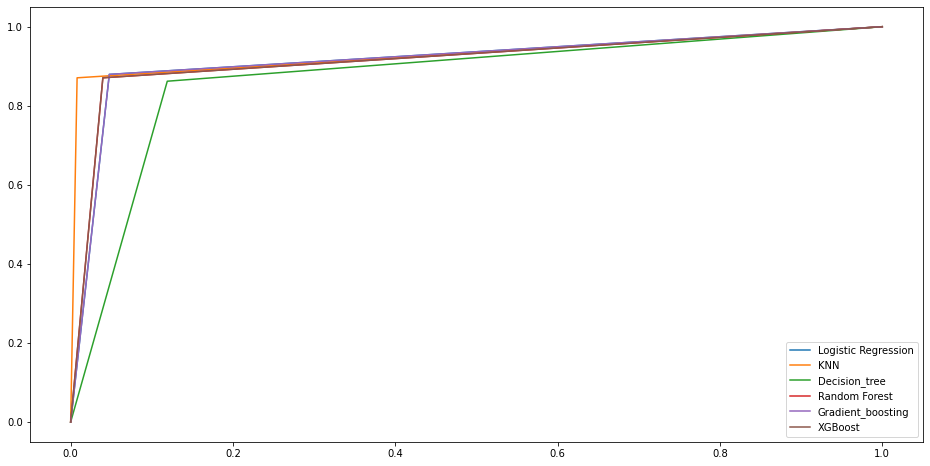

In [29]:
# fit the model and print the trainig accuracy 
# Ploting the roc curve 

plt.figure(figsize=(16,8))
for name, clf in classifiers.items():
    model=clf.fit(x_train, y_train)
    cv_score = cross_val_score(clf, x_train, y_train, cv=5)
    y_pred=model.predict(x_test)
    fpr,tpr,_=roc_curve(y_test,y_pred)
    print(f'{name} has  cv score of {round(cv_score.mean()*100,2)}%' )
    print(f'{name} has accuracy score of {round(accuracy_score(y_test,y_pred)*100,2)}%\n')
    print(f'Classification report of {name} is\n',classification_report(y_test,y_pred))
    plt.plot(fpr,tpr,label=name)
    plt.legend()

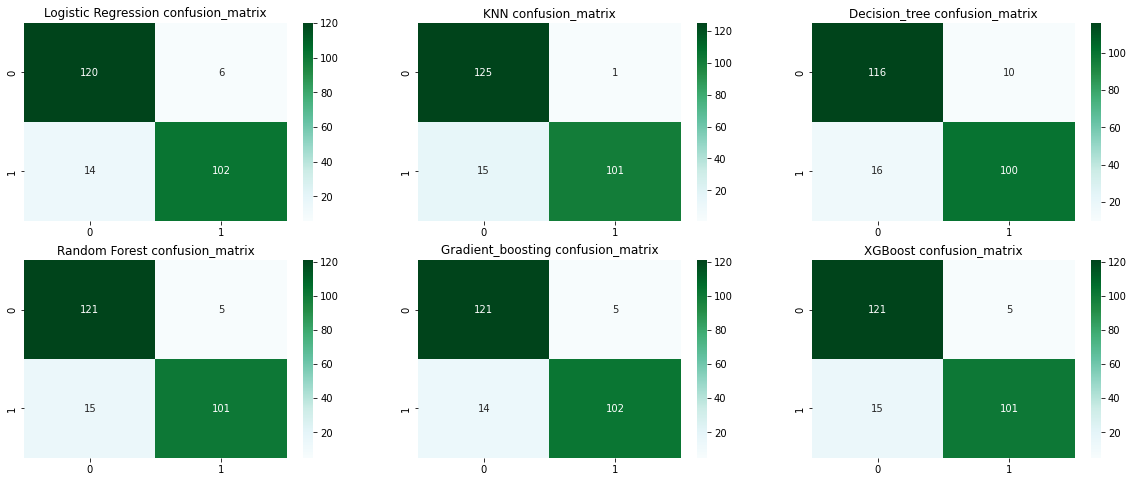

In [30]:
# confusion matrics

fig,axes=plt.subplots(2,3,figsize=(20,8))
axes=axes.flatten()
for i,(keys, clf) in enumerate(classifiers.items()):
    model=clf.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    confusion_matrix_df=pd.DataFrame(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix_df, annot=True, cmap='BuGn',fmt='g',ax=axes[i])
    axes[i].set_title(f'{keys} confusion_matrix')


# 2. Over sampling technique
- In over sampling new data points are created  from minority class
- In over sampling we are not lossing the information

In [31]:
# split the datas et into feature and target column

x=df.drop(['Class'],axis=1)
y=df['Class']

In [32]:
# Over sampling using SMOTE


from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')

x_over,y_over=smote.fit_resample(x,y)


#from imblearn.over_sampling import RandomOverSampler
#oversample = RandomOverSampler(sampling_strategy='minority')

In [33]:
# now check the shape 

x_over.shape

(568630, 30)

In [34]:
# counting the values related to fraud transatction and non fraud transaction

y_over.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

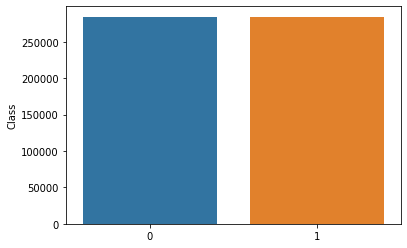

In [35]:
# plot the bar chart

sns.barplot(x=y_over.value_counts().index,y=y_over.value_counts())

### Analysis of over sampled dataset
- No we can see our data set has 568630 rows 
- 284315 data points belong to non fraud transaction
- 284315 data points belongs to fraud transaction
- So we have equal data points for fraud and non fraud transaction class

### Spliting the oversampled dataset into trainig and testing set

In [36]:
# spliting the dataset into trainig and testing dataset

x_over_train,x_over_test,y_over_train,y_over_test=train_test_split(x_over,y_over,test_size=0.25,shuffle=True)

## Model Training using over sampled data set

In [37]:
classifiers={'Logistic Regression':LogisticRegression(),
           'XGBoost': XGBClassifier(tree_method='gpu_hist'),
           }

Logistic Regression has  cv score of 94.92%
Logistic Regression has accuracy score of 94.81%

Classification report of Logistic Regression is
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     70947
           1       0.97      0.92      0.95     71211

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158

XGBoost has  cv score of 99.96%
XGBoost has accuracy score of 99.98%

Classification report of XGBoost is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70947
           1       1.00      1.00      1.00     71211

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



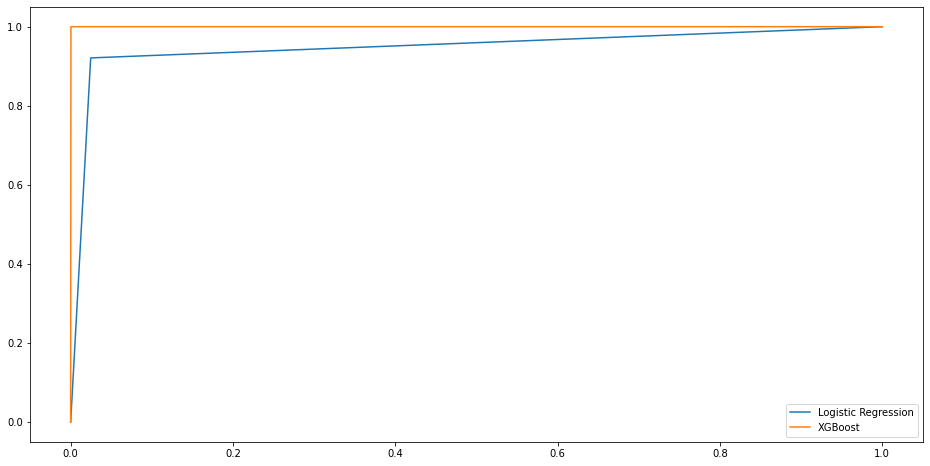

In [38]:
# fit the model and print the trainig accuracy 
# Ploting the roc curve 

plt.figure(figsize=(16,8))
for name, clf in classifiers.items():
    model=clf.fit(x_over_train, y_over_train)
    cv_score = cross_val_score(clf, x_over_train, y_over_train, cv=5)
    y_pred=model.predict(x_over_test)
    fpr,tpr,_=roc_curve(y_over_test,y_pred)
    print(f'{name} has  cv score of {round(cv_score.mean()*100,2)}%' )
    print(f'{name} has accuracy score of {round(accuracy_score(y_over_test,y_pred)*100,2)}%\n')
    print(f'Classification report of {name} is\n',classification_report(y_over_test,y_pred))
    plt.plot(fpr,tpr,label=name)
    plt.legend()

In [39]:
# use LogisticsRegression model

# trainig the model
xgb=XGBClassifier(tree_method='gpu_hist')

xgb.fit(x_over_train,y_over_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Prediction 

In [40]:
y_pred=xgb.predict(x_over_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [41]:
# check the n umber of error points

data_1=pd.DataFrame(y_over_test)
data_1['prediction']=y_pred
print('The number of error points are ',len(data_1[data_1['Class']!=data_1['prediction']]))

The number of error points are  26


## Performance of model

In [42]:
print('\nAccuracy_score of XGBClassifier is ', round(accuracy_score(y_over_test,y_pred)*100,2))
print('\nprecision_score of XGBClassifier  is ', round(precision_score(y_over_test,y_pred)*100,2))
print('\nrecall_score of XGBClassifier  is ', round(recall_score(y_over_test,y_pred)*100,2))
print('\nf1_score of XGBClassifier  is ', round(f1_score(y_over_test,y_pred)*100,2))


Accuracy_score of XGBClassifier is  99.98

precision_score of XGBClassifier  is  99.96

recall_score of XGBClassifier  is  100.0

f1_score of XGBClassifier  is  99.98


<AxesSubplot:>

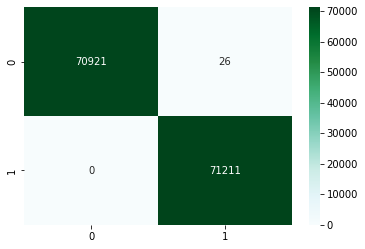

In [43]:
# confusion matrix
confusion_matrix_df=pd.DataFrame(confusion_matrix(y_over_test,y_pred))

sns.heatmap(confusion_matrix_df,annot=True, fmt='g',cmap='BuGn')

In [48]:
# create the directory
#!mkdir model

# save the pickle format of model
file_name='/kaggle/working/model/model.pkl'

pickle.dump(xgb,open(file_name,'wb'))


##  Building Neural Network

In [60]:
#  use over sampled data set
# spliting the data set into trainig and testing set
x_over_train,x_over_test,y_over_train,y_over_test=train_test_split(x_over,y_over,
                                                                   test_size=0.25,shuffle=True)

In [61]:
# printig the shape of model
x_over_train.shape

(426472, 30)

In [62]:
# importing libraries

import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.metrics import sparse_categorical_crossentropy

In [63]:
# creating layers of model

model=Sequential()
model.add(Dense(512, input_shape=(x_over_train.shape[1],), activation ='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2,activation='softmax'))


# compiling the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# printing the summary of model\

model.summary()

2023-02-02 07:15:15.655860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 07:15:15.659849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 07:15:15.660608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 07:15:15.661848: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               15872     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 173,102
Trainable params: 173,102
Non-trainable params: 0
_________________________________________________________________


In [66]:
# fitting the model

history=model.fit(x_over_train,y_over_train,
          epochs=10,
          batch_size=32,
          validation_split=0.20,
          verbose=1)

Epoch 1/10
10662/10662 [==============================] - 26s 2ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0079 - val_accuracy: 0.9988
Epoch 2/10
10662/10662 [==============================] - 26s 2ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 3/10
10662/10662 [==============================] - 27s 3ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 4/10
10662/10662 [==============================] - 26s 2ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 5/10
10662/10662 [==============================] - 27s 3ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 6/10
10662/10662 [==============================] - 28s 3ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 0.0084 - val_accuracy: 0.9988
Epoch 7/10
10662/10662 [==============================] - 28s 3ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0

<AxesSubplot:>

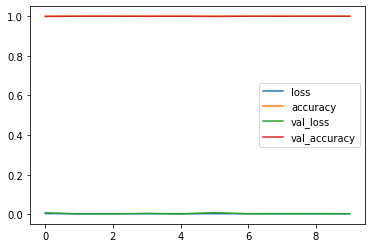

In [72]:
pd.DataFrame(history.history).plot(kind='line')